## Loading the required libraries 

In [1]:
# First of all import the required libraries 
# Data and math  
import pandas as pd
import numpy as np 
import csv

# Visualisation 
import matplotlib.pyplot as plt  # für Matplotlib
%matplotlib inline
import seaborn as sns            # für Seaborn
import plotly.express as px      # für Plotly Express
#%matplotlib inline

# Import System Libraries 
import warnings
import os
# Ignor all warnings, because there is a front problem with mach 
warnings.filterwarnings("ignore")

## Finding the data and loading the data 

In [2]:
# Retrieving data 

# Path to the neighbouring data folder
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data')

print(data_path)

# DKB csv files have a cryptic head which needs to be jumped over to make it readable
headerSize = 4

# Make empty list for later concatenation of all df 
dataframes = []

# Reading all data and save them in global variables 
# Iterate through all files in the Data directory
for filename in os.listdir(data_path):
    # Check if the file is a .csv file
    if filename.endswith('.csv'):
        # Create the full path to the file
        file_path = os.path.join(data_path, filename)

        # Extract the last 4 digits of the filename (before the extension)
        last_four_digits = filename[-8:-4]  # Assumption: There are always 4 digits before the file extension
        
        # Make the year variable 
        year = int(last_four_digits)

        # Read the .csv file into a DataFrame
        print(file_path)
        df = pd.read_csv(file_path, sep=';', skiprows=headerSize, header=0, encoding='utf-8-sig')

        # Save the DataFrame under the desired name
        globals()[f'df_{last_four_digits}'] = df

        # Safe in global list 
        dataframes.append(df)

        # Shape of df 
        print('Shape:', df.shape)
        # Spaltennamen ausgeben
        spaltennamen = df.columns
        print('Column names:', df.columns) 

        df.head()

# Concatenate all data to one big dataframe
df = pd.concat(dataframes, ignore_index=True)


/Users/tillo/Repositoriums/FinanceGrouper/data
/Users/tillo/Repositoriums/FinanceGrouper/data/DKB_transaction_2023.csv
Shape: (534, 12)
Column names: Index(['Buchungsdatum', 'Wertstellung', 'Status', 'Zahlungspflichtige*r',
       'Zahlungsempfänger*in', 'Verwendungszweck', 'Umsatztyp', 'IBAN',
       'Betrag (€)', 'Gläubiger-ID', 'Mandatsreferenz', 'Kundenreferenz'],
      dtype='object')


## First cleaning of data set

In [3]:
### Deleting empty columns and rows for each df before saving it in a global variable 
# Identify columns that contain only NaN values
nan_columns = df.columns[df.isna().all()].tolist()    
# Drop the columns with only NaN values
df.drop(columns=nan_columns, inplace=True)
# Delete all rows that are completely empty (i.e., contain only NaN values)
empty_rows = df[df.isna().all(axis=1)].index
df.drop(index=empty_rows, inplace=True)

print(df.info())
df['Betrag (€)'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Buchungsdatum         534 non-null    object
 1   Wertstellung          533 non-null    object
 2   Status                534 non-null    object
 3   Zahlungspflichtige*r  534 non-null    object
 4   Zahlungsempfänger*in  534 non-null    object
 5   Verwendungszweck      534 non-null    object
 6   Umsatztyp             534 non-null    object
 7   IBAN                  534 non-null    object
 8   Betrag (€)            534 non-null    object
 9   Gläubiger-ID          37 non-null     object
 10  Mandatsreferenz       37 non-null     object
 11  Kundenreferenz        488 non-null    object
dtypes: object(12)
memory usage: 50.2+ KB
None


0       -11,2
1           0
2        -147
3    2.137,32
4      -22,67
Name: Betrag (€), dtype: object

## Set type of data of the columns 

In [4]:
# Fix US / EU decimal-point/comma
df['Betrag (€)'] = df['Betrag (€)'].str.replace('.','')
df['Betrag (€)'] = df['Betrag (€)'].str.replace(',','.')

In [5]:

# All columns will be set accordingly as dtype to what sort of stuff they contain 
df['Buchungsdatum'] = pd.to_datetime(df['Buchungsdatum'], format='%d.%m.%y', errors='coerce')
df['Wertstellung'] = pd.to_datetime(df['Wertstellung'], format='%d.%m.%y', errors='coerce')
df['Status'] = df['Status'].astype('category')
df['Zahlungspflichtige*r'] = df['Zahlungspflichtige*r'].astype('string')
df['Zahlungsempfänger*in'] = df['Zahlungsempfänger*in'].astype('string')
df['Verwendungszweck'] = df['Verwendungszweck'].astype('string')
df['Umsatztyp'] = df['Umsatztyp'].astype('category')
df['IBAN'] = df['IBAN'].astype('string')

# Make sure euro is set to string 
df['Betrag (€)'] = df['Betrag (€)'].astype(float)

df['Gläubiger-ID'] = df['Gläubiger-ID'].astype('string')
df['Mandatsreferenz'] = df['Mandatsreferenz'].astype('string')
df['Kundenreferenz'] = df['Kundenreferenz'].astype('string')

#Check if it worked 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Buchungsdatum         534 non-null    datetime64[ns]
 1   Wertstellung          533 non-null    datetime64[ns]
 2   Status                534 non-null    category      
 3   Zahlungspflichtige*r  534 non-null    string        
 4   Zahlungsempfänger*in  534 non-null    string        
 5   Verwendungszweck      534 non-null    string        
 6   Umsatztyp             534 non-null    category      
 7   IBAN                  534 non-null    string        
 8   Betrag (€)            534 non-null    float64       
 9   Gläubiger-ID          37 non-null     string        
 10  Mandatsreferenz       37 non-null     string        
 11  Kundenreferenz        488 non-null    string        
dtypes: category(2), datetime64[ns](2), float64(1), string(7)
memory usage: 43.1 KB

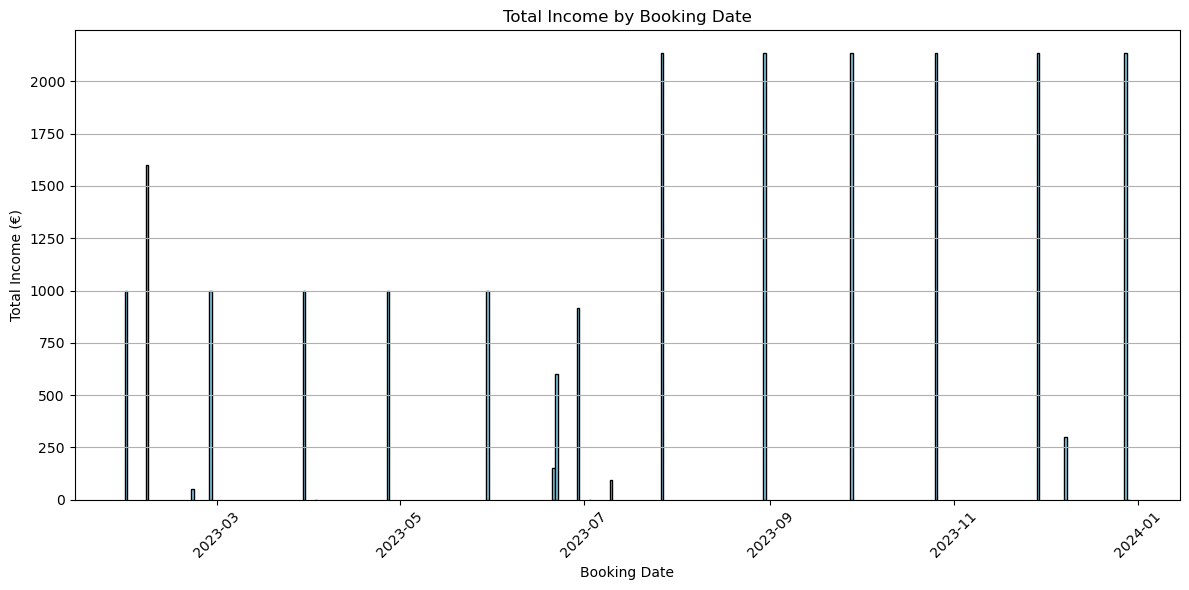

In [10]:
# Step 1: Filter the DataFrame for income entries
income_data = df[df['Umsatztyp'] == 'Eingang']

# Step 3: Group by Buchungsdatum and sum the Betrag (€) to get total income per date
total_income_per_date = income_data.groupby('Buchungsdatum')['Betrag (€)'].sum().reset_index()

# Step 4: Plotting the total income by booking date
plt.figure(figsize=(12, 6))
plt.bar(total_income_per_date['Buchungsdatum'], total_income_per_date['Betrag (€)'], color='skyblue', edgecolor='black')
plt.title('Total Income by Booking Date')  # Title of the plot
plt.xlabel('Booking Date')  # X-axis label
plt.ylabel('Total Income (€)')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.grid(axis='y')  # Add grid lines to y-axis
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

Data type of amounts: float64
    Year  Month  Betrag (€)
0   2023      1      999.00
1   2023      2     2650.00
2   2023      3      999.00
3   2023      4      999.00
4   2023      5      999.00
5   2023      6     1669.92
6   2023      7     2232.32
7   2023      8     2137.32
8   2023      9     2137.32
9   2023     10     2137.32
10  2023     11     2137.32
11  2023     12     2437.32


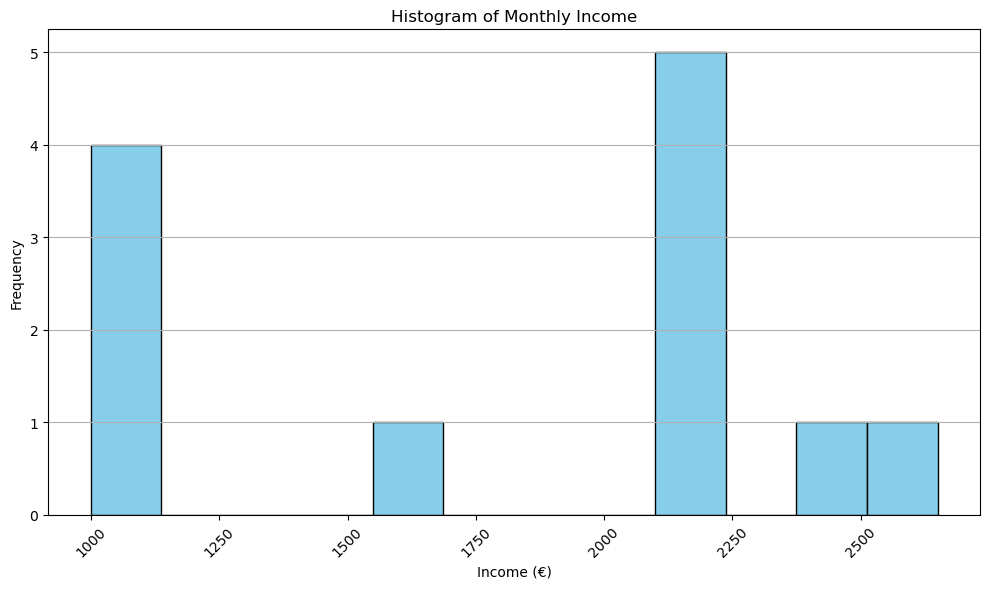

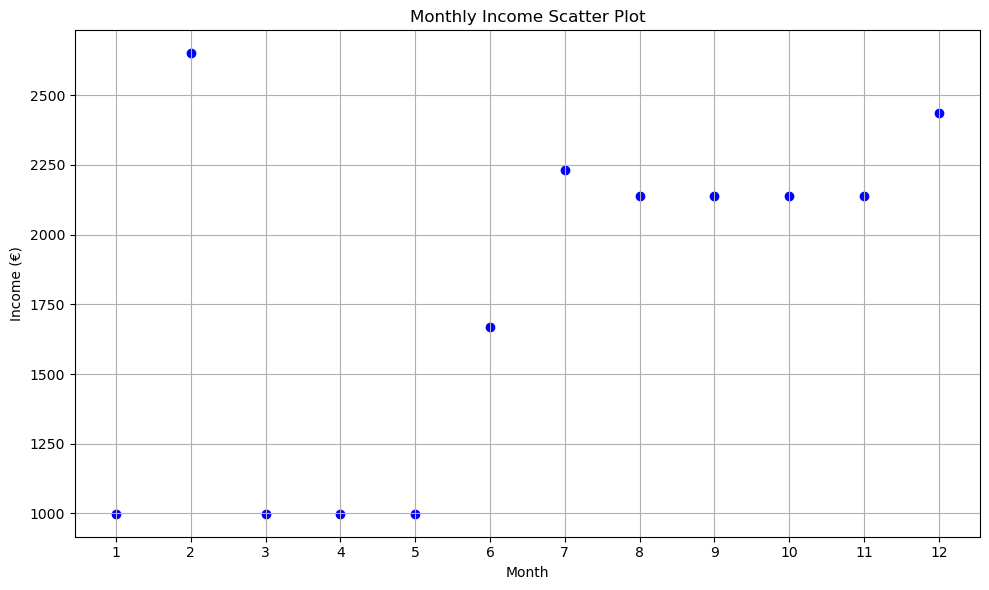

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        12 non-null     int64  
 1   Month       12 non-null     int64  
 2   Betrag (€)  12 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes
None


In [8]:
# Step 1: Filter the DataFrame for income transactions
income = df[df['Umsatztyp'] == 'Eingang']  # Filter for 'Income' transactions

# Step 2: Convert the 'Buchungsdatum' to datetime format
income['Buchungsdatum'] = pd.to_datetime(income['Buchungsdatum'], errors='coerce')  # Coerce errors to NaT

# Step 3: Extract Year and Month from the 'Buchungsdatum'
income['Year'] = income['Buchungsdatum'].dt.year
income['Month'] = income['Buchungsdatum'].dt.month

# Step 4: Sum the amounts by Year and Month
income_aggregated = income.groupby(['Year', 'Month'])['Betrag (€)'].sum().reset_index()

# Remove rows with NaN in the 'Betrag (€)' column
income_aggregated.dropna(subset=['Betrag (€)'], inplace=True)

# Debugging: Print the data type and the aggregated DataFrame
print("Data type of amounts:", income_aggregated['Betrag (€)'].dtype)
print(income_aggregated)


# Step: Create a histogram of income amounts
plt.figure(figsize=(10, 6))
plt.hist(income_aggregated['Betrag (€)'], bins=len(income_aggregated['Month']), color='skyblue', edgecolor='black')  # Histogram
plt.title('Histogram of Monthly Income')  # Title of the plot
plt.xlabel('Income (€)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-ticks if necessary
plt.grid(axis='y')  # Add grid lines to y-axis
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Step: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(income_aggregated['Month'], income_aggregated['Betrag (€)'], color='blue', marker='o')  # Scatter plot
plt.title('Monthly Income Scatter Plot')  # Title of the plot
plt.xlabel('Month')  # X-axis label
plt.ylabel('Income (€)')  # Y-axis label
plt.xticks(income_aggregated['Month'])  # Set x-ticks to show each month
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

print(income_aggregated.info())

### Read csv
Works for DKB csv as of 2022-12-31.

In [7]:
# Read metadata
with open(csv_file,"r",encoding="latin-1") as f:
    reader = csv.DictReader(f,delimiter=";")
    metadata = {}
    for i, row in enumerate(reader):
        if i < 3:
            key = None
            value = None
            for k, v in row.items():
                if k == "Kontonummer:":
                    key = row["Kontonummer:"]
                    continue
                if k == "":
                    continue
                value = v
            
            if ":" in key:
                key = key.replace(":","")
            if "Kontostand" in key:
                key = "Kontostand"
            if "EUR" in value:
                value = value.replace(" ","").replace("EUR","")

            metadata[key] = value
            
# print(metadata)

start_date = datetime.strptime(metadata["Von"],"%d.%m.%Y").date()
end_date = datetime.strptime(metadata["Bis"],"%d.%m.%Y").date()
end_balance = float(metadata["Kontostand"].replace(".","").replace(",","."))

NameError: name 'csv_file' is not defined

In [ ]:
print("start:",start_date)
print("end:",end_date)
print("end balance:",end_balance)

## Named Columns

In [ ]:
party = "Auftraggeber / Begünstigter"
category = "Kategorie"
amount = "Betrag (EUR)"
cause = "Verwendungszweck"
posting_text = "Buchungstext"
balance = "Kontostand (EUR)"

### Cleanup

In [ ]:
# Fix US / EU decimal-point/comma
data[amount] = data[amount].str.replace('.','')
data[amount] = data[amount].str.replace(',','.')
data[amount] = data[amount].astype('float')

# avoid nan being interpreted as float in specific columns
data[party] = data[party].astype(str)
data[cause] = data[cause].astype(str)
data[posting_text] = data[posting_text].astype(str)

In [ ]:
data.head()

### Remove small transactions to avoid noise

In [ ]:
data = data[abs(data[amount]) > 0.01]

### Inverse Dataframe to have first day first and filter by time-range

In [ ]:
from dateutil.relativedelta import relativedelta
if number_of_last_months_to_analyse > 0:
    start_date = end_date - relativedelta(months=number_of_last_months_to_analyse)
    
print(f"Analysing time range: {start_date} -> {end_date}")
data = data.loc[str(start_date):str(end_date)]
data = data.iloc[::-1]

In [ ]:
fr = data.index[0]
to = data.index[-1]
print(fr,"->",to)

### Compute balance at each transaction

In [ ]:
data_balance = data[amount].sum().round(2)
start_balance = end_balance - data_balance
data[balance] = data[amount].cumsum()+start_balance

In [ ]:
print("start",start_balance)
print("end",end_balance)
print("balance during csv timespan",data_balance)

## Balance over time

In [ ]:
data[balance].plot(
    title='Account balance DKB %s' % accountname,
    grid=True,
    figsize=(20,8)
);

## Breakdown by transaction party

In [ ]:
empfgroup = data.groupby(party).agg({amount:"sum"})

In [ ]:
# Short the names
empfgroup.index = [str(i)[:30] for i in empfgroup.index]

In [ ]:
empfgroup[amount].head()

In [ ]:
empfgroup = empfgroup.sort_values(amount,ascending=False)
gutschrift = empfgroup[amount] > 0
colors = list( map(lambda x: "g" if x else "r" , gutschrift) )

In [ ]:
empfgroup[empfgroup[amount].abs() > 50].plot.barh(
    figsize=(10,60),
    title=u'Aggregierte Zahlungen ab 50€ (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
  );

In [ ]:
data.head()

## Breakdown by Category
We use some heuristics on the tranasaction details to put them into different categories.
All transactions within a category will be aggregated for a better overall analysis.
You may need to check the print output of the next cell and possibly adapt the mapping function for a better categorisation.

**the text will be lower cased before categorisation**

**Feel free to change these heuristic mappings - or adapt the code to map according to specififc transaction details.**

In [ ]:
categories = {
    "eat_out_or_get_food": [
        "restaurant",
        "gastro",
        "dean david",
        "cafe",
        "baeckerei",
        "coffee fellows",
        "jim block",
        "don qui",
        "Osteria",
        "subway",
        "backhaus",
        "burger king",
        "campus suite",
        "juice.more",
        "Backerei",
        "Avni Terhani",
        "vegan",
        "thai",
        "indisch",
    ],
    "alltag_laden": [
        "lidl",
        "aldi",
        "edeka",
        "alnatura",
        "rewe",
        "vollcorner",
    ],
    "spezial_laden": [
        "karstadt",
        "galeria",
        "kaufhof",
        "mueller",
        "migros",
        "coop",
        "dm fil",
        "go asia",
        "Drogerie",
        "SUCKFUELL",
        "butlers",
        "Suckfull",
        "Bio-Market",
        "conrad m",
    ],
    "online_handel":[
        "otto",
        "conrad elec",
        "amzn mktp",
        "amazon",
    ],
    "transport": [
        "FERNVERKEHR",
        "flixbus",
        "PAYPAL .DBVERTR",
    ],
    "ausflug": [
        "hamburg",
        "Hotel",
        "PAYPAL .booking",
        "prague",
        "praha",
        "Tubingen",
    ],
    "project": [
        "openai",
        "google.cloud",
        "github",
    ],
    "freizeit": [
        "VOLKSBAD",
        "PAYPAL .SENNHEISER",
    ],
    "entertainment": [
        "magellan",
        "Amazon Prime",
        "paypal .steam",
        "netflix"
    ],
    "crypto": [
        "bitflyer",
        "coinbase"
    ],
    "health": [
        "apotheke",
        "Krankenversicherung",
    ],
    "cash": [
        "bargeld",
        "automat",
        "cash"
    ],
    "dkb": [
        "DKB",
        "KREDITBANK",
    ],
    "miete": [],
    "investment": [],
    "emergency_fund":[],
    "uncategorized": [
        "PayPal (Europe)",
    ],
    "card_payment": [],
    "minor": [ # populated automatically
    ]
}

def mapToCategory(x):
    # use these transaction details to map to a category
    p = x[party].lower()
    pt = x[posting_text].lower()
    c = x[cause].lower()
    
    # manual mappings
    if "WERTP. ABRECHN".lower() in c or "Depot ".lower() in c or "WERTPAPIER".lower() in c:
        return "investment"
    
    if "miete ".lower() in c:
        return "miete"
    
    if "KREDITKARTENABRECHNUNG".lower() in c:
        return "card_payment"
    
    # mappings by category
    for cat, cat_words in categories.items():
        if any(map(lambda r: r.lower() in p, cat_words)) or any(map(lambda r: r.lower() in pt, cat_words)):
            return cat
    
    # debitcard. may need adaptation
    if "Debitk.20 VISA Debit".lower() in c:
        return "card_payment"
    
    return p

data[category] = data.apply(lambda x: mapToCategory(x), axis=1)

print(len(data[category].unique()),"categories")

print("============ uncategorized =================")
s = 0
for x in data[category].unique():
    ok = False
    
    for cat in categories.keys():
        if x == cat:
            ok = True

    if not ok:
        print(x)
        idx = data[category] == x
        s = s + abs(data[idx][amount].sum())
        
print("================================ sum of uncategorized: ",s) # todo. this doesn't seem to make sense ... 🤔

Breakdown by category. (Ignored transactions below 10€).

In [ ]:
byCategory = data.groupby(category).agg({amount:"sum"}).sort_values(amount,ascending=False)
byCategory = byCategory[abs(byCategory[amount]) > 10]
    

costs = byCategory[byCategory[amount] < 0]
costs.loc[:,amount] = -costs[amount]

total_costs = costs[amount].sum()
costs.plot.pie(
    figsize=(12,12),
    y=amount,
    legend=None,
    autopct=lambda x: str(round(x/100*total_costs)) + "€ | " + str(round(x)) + "%",
    title=u'Nach Kategorie Aggregierte Kosten (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
)
plt.show()

byCategory[byCategory[amount] > 0].plot.pie(
    figsize=(12,12),
    y=amount,
    legend=None,
    title=u'Nach Kategorie Aggregiertes Einkommen (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
)
plt.show()


byCategory.plot.barh(
    figsize=(6,40),
    grid=True,
    title=u'Nach Kategorie Aggregierte Zahlungen (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
)
plt.show()


### Category analysis

In [ ]:
def quick_category_analyse(cat,desc=party):
    excursions = data[data[category] == cat].sort_values(amount,ascending=True)

    excursions.plot.barh(
        figsize=(12,12),
        x=desc,
        y=amount,
        legend=None,
    )
    plt.show()

    return excursions

In [ ]:
quick_category_analyse("investment",desc=cause)

In [ ]:
quick_category_analyse("dkb", desc=cause)

In [ ]:
quick_category_analyse("ausflug")

In [ ]:
quick_category_analyse("card_payment")

In [ ]:
quick_category_analyse("transport")